# Home assigment 1

Please give your name below:

In [ ]:
name='Alexander Hedene'

## Exercise 2

When you enter a nuclear physics lab, you often find a nice [nuclide chart](https://en.wikipedia.org/wiki/Table_of_nuclides) on the wall. Now we will try to make our own, where we color the nuclides according to the average binding energy of the nuclides.

Along this home assignment you find a file called 'HA1-relmass.txt' (downloaded from https://www.nist.gov/pml/atomic-weights-and-isotopic-compositions-relative-atomic-masses
). This contains a list of several nuclides in the following format:

```
    Atomic Number = 1
    Atomic Symbol = H
    Mass Number = 1
    Relative Atomic Mass = 1.00782503223(9)
    Isotopic Composition = 0.999885(70)
    Standard Atomic Weight = [1.00784,1.00811]
    Notes = m
```

Your task is going to be to 

- extract the information from the file 'HA1-relmass.txt' with python. Your interest will be the atomic number, symbol, mass number and relative atomic mass. Arrange the data into a dictionary of dictionaries, where the keys of the main dictionary are formatted as `symbolA` (eg. `H1`,`U235`), and the keys of the subdictionaries are `Z`, `A`, `m`). Thus the dictionary will look like:

```
    isotopes={'H1': {'Z': 1,'A': 1,'m': 1.00782503223},
              'D2': {'Z': 1,'A': 2,'m': 2.01410177812}
               ...}
```

- During the datalab you have written a function to calculate the average binding energy per nucleon. Use this function to calculate the binding energy of each nuclide, and include this information as another entry with key `'eps'` in the subdictionaries.

```
    isotopes={...,
              'D2': {'Z': 1,'A': 2,'m': 2.01410177812, 'eps': 1.1122897908460128},
               ...}
```

- Find out which nuclide has the highest binding energy per nucleon.
- Create a 2D numpy array called `NZ` which has 119 rows (the highest atomic number) and 178 columns (the highest neutron number). Fill it up with the binding energy per nucleon value.
- Plot the content of `NZ` with `plt.imshow()`. (hint: for N-Z pairs for which no known nuclide exists you probably allocated 0.0 as the binding energy. The default colormap of matplotlib will color these values as blue. If you want these values to be colored white you can convert all 0.0 values to `np.nan`.)

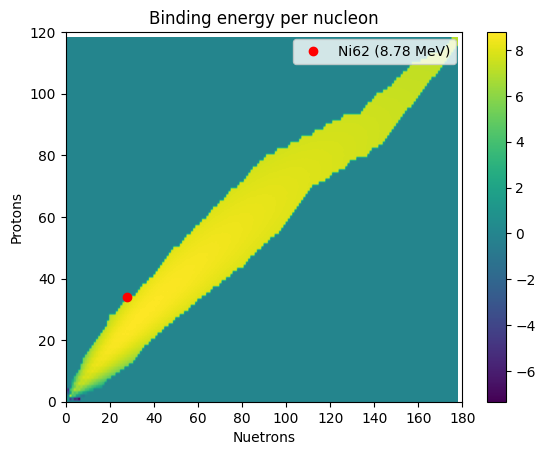

In [ ]:
def BAZ_BW(A,Z):
    """Function to calculate the binding energy per nucleon
    with the semi-empirical formula
    
    Parameters
    ----------
    A : int
        Mass number of nuclide
    Z : int
        Proton number of nuclide
    """
    #your code comes here
    delta = 0
    if (A%2 + Z%2) > 1:
        delta = -1
    elif (A%2 + Z%2) == 0:
        delta = 1
    eps = 15.75*A - 98.8*(A/2-Z)**2/A-17.8*A**(2/3)-0.71*Z**2*A**(-1/3)+34*delta*A**(-3/4)
    return eps/A


import numpy as np  
import matplotlib.pyplot as plt 

with open("HA1-relmass.txt", "r") as myFile:
    blocks = myFile.read().strip().split("\n\n")

isotopes = {}
i = 0
key_max = "H1"
for block in blocks:
    lines = block.strip().splitlines()
    
    # Extracting the relevant information from each block
    Z = lines[0].split("=")[1].strip()
    name = lines[1].split("=")[1].strip()
    A = lines[2].split("=")[1].strip()
    mass = lines[3].split("=")[1].split("(")[0]
    
    # Calculate the binding energy per nucleon
    eps = BAZ_BW(int(A), int(Z))
    # Create a key for the isotope and store its properties
    key = name + A
    isotopes[key] = {
        'Z': int(Z),
        'A': int(A),
        'mass': float(mass),
        'eps': eps
    }
    if eps > isotopes[key_max]['eps']:
        key_max = key
NZ = np.zeros([119, 178], dtype=float)  # Initialize a 2D array for binding energies
for value in isotopes.values():
    Z = value['Z']
    A = value['A']
    if A >= Z:
        NZ[Z, A-Z] = value['eps']
NZ[1,0] = 0  # Set the binding energy for Hydrogen to zero since there is no binding energy for a single proton
plt.imshow(NZ, origin='lower')
plt.colorbar()
plt.title("Binding energy per nucleon")
plt.xlabel("Nuetrons")
plt.ylabel("Protons")
plt.xlim(0, 180)
plt.ylim(0, 120)
plt.plot(isotopes[key_max]['Z'], isotopes[key_max]['A'] - isotopes[key_max]['Z'], 'ro', markersize=6, label=f'{key_max} ({isotopes[key_max]["eps"]:.2f} MeV)')
plt.legend()




